In [2]:
!pip install tensorflow

In [22]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv(r'mnist_784_csv.csv')
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [13]:
x = data.drop(columns='class').values
x.shape

(70000, 784)

In [17]:
y = data['class'].values
y.shape

(70000,)

In [18]:
# One hot encoding:
y = to_categorical(y, num_classes=10)
y.shape

(70000, 10)

In [19]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [20]:
x_train.shape
y_train.shape

x_test.shape
y_test.shape

(14000, 10)

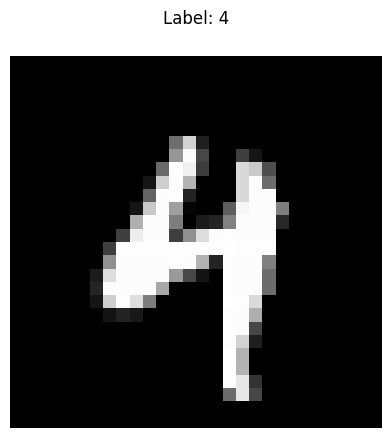

In [23]:
#show sample single:
sample_image = x_train[5].reshape(28,28)
digit_label = np.argmax(y_train[5])

#display
plt.matshow(sample_image, cmap='gray')
plt.title(f'Label: {digit_label}')
plt.axis('off')
plt.show()

<Figure size 400x2000 with 0 Axes>

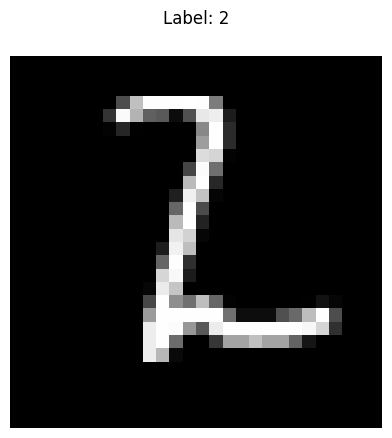

<Figure size 400x2000 with 0 Axes>

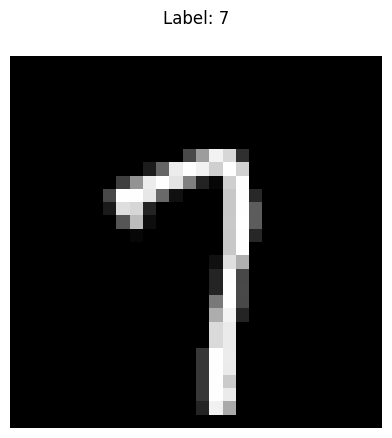

<Figure size 400x2000 with 0 Axes>

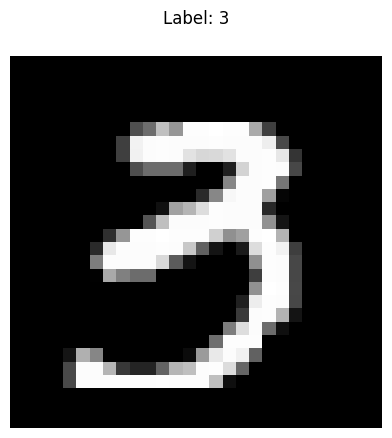

<Figure size 400x2000 with 0 Axes>

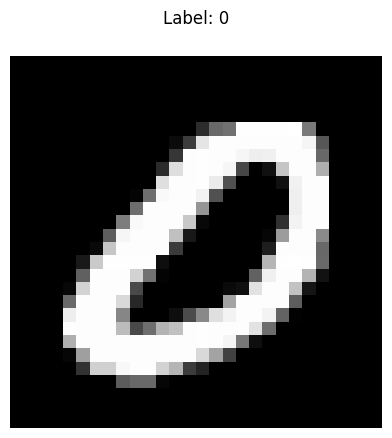

<Figure size 400x2000 with 0 Axes>

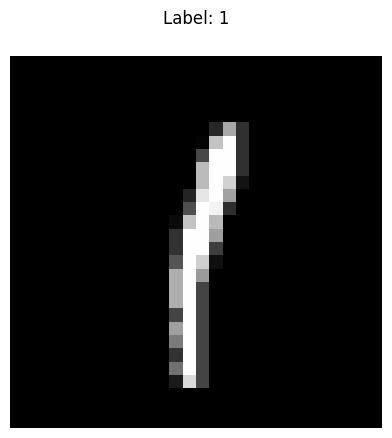

In [31]:
# Show first 5 as sample
for i in range(5):
  plt.figure(figsize=(4,20))
  sample_image = x_train[i].reshape(28,28)
  digit_label = np.argmax(y_train[i])

  #display
  plt.matshow(sample_image, cmap='gray')
  plt.title(f'Label: {digit_label}')
  plt.axis('off')
plt.show()

In [26]:
# Model Architecture
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
# Compile model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
# Compile
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs = 10,
    validation_split=0.2
)

Epoch 1/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7789 - loss: 6.2108 - val_accuracy: 0.8976 - val_loss: 0.4174
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9115 - loss: 0.3412 - val_accuracy: 0.9237 - val_loss: 0.3036
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9315 - loss: 0.2507 - val_accuracy: 0.9245 - val_loss: 0.2927
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9427 - loss: 0.2051 - val_accuracy: 0.9464 - val_loss: 0.1938
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9523 - loss: 0.1766 - val_accuracy: 0.9457 - val_loss: 0.1951
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9580 - loss: 0.1462 - val_accuracy: 0.9501 - val_loss: 0.1900
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9611 - loss: 0.1407 - val_accuracy: 0.9571 - val_loss: 0.1690
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9671 - loss: 0.1170 - 

In [30]:
# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss: ',test_loss)
print('Test acc: ',test_acc)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9471 - loss: 0.2272
Test loss:  0.21889126300811768
Test acc:  0.9487857222557068


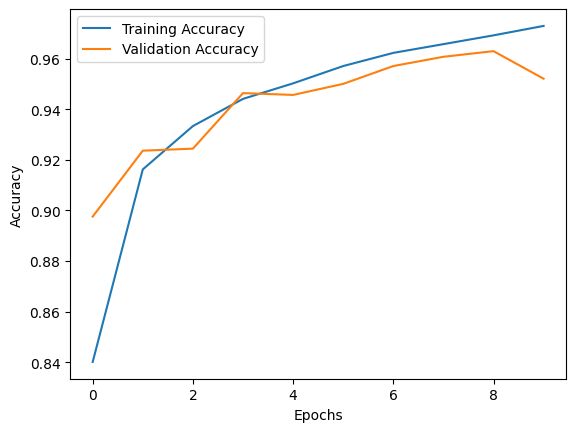

In [34]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<Figure size 400x2000 with 0 Axes>

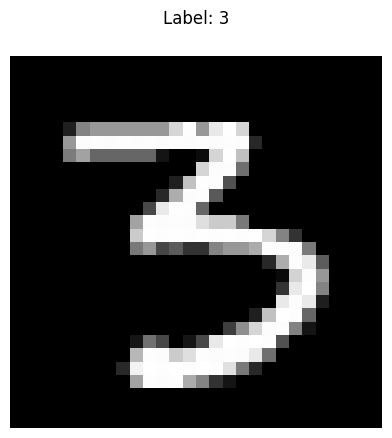

<Figure size 400x2000 with 0 Axes>

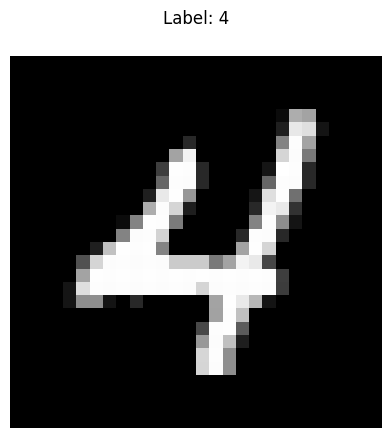

<Figure size 400x2000 with 0 Axes>

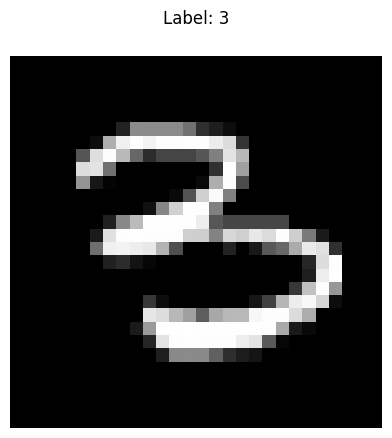

<Figure size 400x2000 with 0 Axes>

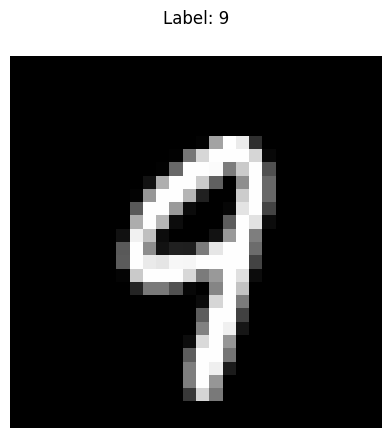

<Figure size 400x2000 with 0 Axes>

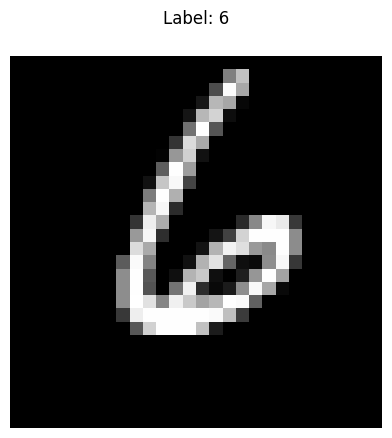

In [35]:
# Test and Display predicted labels:
for i in range(5):
  plt.figure(figsize=(4,20))
  sample_image = x_test[i].reshape(28,28)
  digit_label = np.argmax(y_test[i])

  #display
  plt.matshow(sample_image, cmap='gray')
  plt.title(f'Label: {digit_label}')
  plt.axis('off')
plt.show()